# Installing dependencies


*   Tensor flow is a deep learning library
*   pandas to read the excel data

*   Matplotlib for plotting









In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv.zip to train.csv (1).zip


In [ ]:
sub = pd.read_csv('train.csv.zip',encoding = 'ISO-8859-1' )

# Preprocessing

In [ ]:
sub.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
sub.isnull()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


Removing Null values

In [ ]:
sub=sub.dropna()

In [ ]:
X=sub['comment_text']
Y=sub[sub.columns[2:]].values

In [ ]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

Capital to lower case

In [ ]:
X=X.apply(lambda x: x.lower())

In [ ]:
X

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

Remove new line

In [ ]:
X=X.replace('\n',' ', regex=True)

In [ ]:
X

0         explanation why the edits made under my userna...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         " more i can't make any real suggestions on im...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself   that is a ...
159568    spitzer   umm, theres no actual article for pr...
159569    and it looks like it was actually you who put ...
159570    " and ... i really don't think you understand....
Name: comment_text, Length: 159571, dtype: object

Removing puntuations

In [ ]:
X=X.str.replace(r'[^\w\s]+', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
X

0         explanation why the edits made under my userna...
1         d aww  he matches this background colour i m s...
2         hey man  i m really not trying to edit war  it...
3           more i can t make any real suggestions on im...
4         you  sir  are my hero  any chance you remember...
                                ...                        
159566     and for the second time of asking  when your ...
159567    you should be ashamed of yourself   that is a ...
159568    spitzer   umm  theres no actual article for pr...
159569    and it looks like it was actually you who put ...
159570      and   i really don t think you understand   ...
Name: comment_text, Length: 159571, dtype: object

# Stop Words removal

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
filtered_words = [word for word in X if word not in stopwords.words('english')]

In [ ]:
filtered_words

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
MAX_FEATURES=100000

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
vectorizer.adapt(filtered_words)

In [ ]:
vectorized_text = vectorizer(filtered_words)

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  682,    79,     2, ...,     0,     0,     0],
       [  168, 16921,    52, ...,     0,     0,     0],
       [  409,   420,     4, ...,     0,     0,     0],
       ...,
       [29526,  7303,  5175, ...,     0,     0,     0],
       [    6,    11,   569, ...,     0,     0,     0],
       [    6,     4,   139, ...,     0,     0,     0]])>

Data pipeline

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, Y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)## Batch of 16
dataset = dataset.prefetch(8) # helps bottlenecks

Splitting test and validation dataset

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

## Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
import keras
from keras.layers import Embedding
from keras.layers import Dense, Flatten, LSTM
from keras.layers import Input, GlobalMaxPool1D, Dropout
from keras.layers import Activation
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras import optimizers

In [ ]:
##Linear stacks of layers where one layer leads to the next layer
model = Sequential()
##NOw we can add the layers
##Turns positive integers (indexes) into dense vectors of fixed size. Max features is no. of embeddings per word. 32 is the length value
model.add(Embedding(MAX_FEATURES+1,32))
#creating an bidirectional LSTM LAYER
model.add(Bidirectional(LSTM(50, return_sequences = True)))
##This is done to reduce the number  of parameters to learn and the amount of computation performed in the network
model.add(GlobalMaxPool1D())
##Add layers that re-center and re-scale Done to avoid  over-fitting of the data
model.add(BatchNormalization())
#nullifies the contribution of some neurons towards the next layer and leaves unmodified all others
model.add(Dropout(0.1))
##Feature extraction of fully completed layers
## The RELU function returns 0 if the input is negative, but for any positive input, it returns that value back. 
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.1))
##FINAL LAYERS Sigmoid guarantees output will be between 0 and 1
model.add(Dense(6, activation = 'sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          3200032   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 100)        33200     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                      

In [ ]:
history = model.fit(train, epochs=2, validation_data=val)

Epoch 1/2
6981/6981 [==============================] - 832s 119ms/step - loss: 0.0673 - val_loss: 0.0602
Epoch 2/2
6981/6981 [==============================] - 819s 117ms/step - loss: 0.0484 - val_loss: 0.0392


# Prediction

In [ ]:
input_text = vectorizer('i suck i hate you')

In [ ]:
sub.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


array([[0.9973562 , 0.30562922, 0.9651558 , 0.02176334, 0.8045515 ,
        0.08353022]], dtype=float32)

<Figure size 576x360 with 0 Axes>

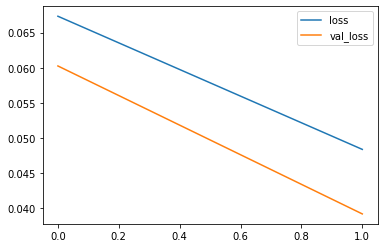

In [ ]:
from matplotlib import pyplot as plt
##he training loss is a metric used to assess how a deep learning model fits the training data. 
## validation loss is a metric used to assess the performance of a deep learning model on the validation set.
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### Now lets predict for a batch

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()
res=(model.predict(batch_X) > 0.5).astype(int)
res

1/1 [==============================] - 0s 104ms/step


array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res.shape

(16, 6)

#Evaluation of the model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    ##Accuracy tells you how many times the ML model was correct overall. 
    ##Precision is how good the model is at predicting a specific category.
     ##Recall tells you how many times the model was able to detect a specific category.
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7994091510772705, Recall:0.7727013230323792, Accuracy:0.4714142382144928
